In [1]:
%matplotlib inline

# Working on Real Project with Python on 'COVID-19 Dataset'

## (A part of Big Data Analysis)

# *COVID-19 SMALL DATASET*

We have taken a small dataset of Covid-19, just for your understaning purpose. You have to work on the original dataset which contains about 19000 rows.

The data used here is till 29-April-2020 and has records as on 29-April-2020.

This data is available as a CSV file, downloaded from Kaggle.

We will analyze this data using the Pandas DataFrame.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
covid_data = pd.read_csv('Covid_19_data.csv')

In [19]:
#1. For acquitance with dataset
# df.count()
# df.isna().sum()

In [28]:
covid_data.count()
# Null values means missing values

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [31]:
# check where we have null values
covid_data.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

In [33]:
# 2. 
# import seaborn as sns
# import mathplotlib.pyplot as plt 
# sns.heatmap(df.isnull())
# plt.show() 

In [25]:
# We can see this null values  in the from of heatmap with seaborn 

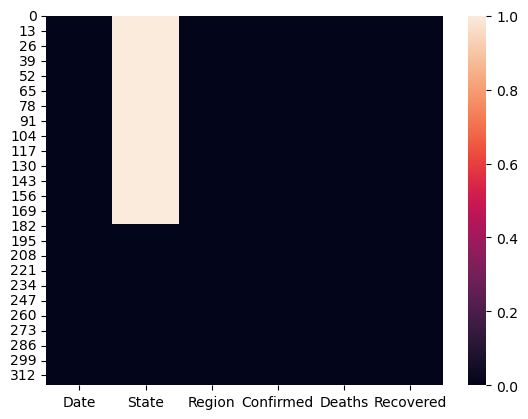

In [34]:
sns.heatmap(covid_data.isnull())
plt.show()

In [38]:
# Whitespaces means null values
# For familiarization with data we use some commands 

In [37]:
covid_data.head(2)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455


In [11]:
covid_data.dtypes

Date         object
State        object
Region       object
Confirmed     int64
Deaths        int64
Recovered     int64
dtype: object

In [13]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


In [14]:
covid_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Confirmed,321.0,9949.800623,31923.853086,0.0,104.0,653.0,4655.0,299691.0
Deaths,321.0,709.152648,3236.162817,0.0,2.0,12.0,144.0,27682.0
Recovered,321.0,3030.277259,14364.870365,0.0,2.0,73.0,587.0,132929.0


### Q.1 ) Show the number of Confirmed , Deaths and Recovered cases in each Region.

In [56]:
# df.groupby("REGION").sum().head(50)
# df.groupby("Region")['Confirmed'].sum().sort_values(ascending=False).head(20) 
# df.groupby("Region")[['Confirmed', 'Recovered']].sum() 

In [57]:
covid_data.groupby("Region").sum()

,Date,State,Confirmed,Deaths,Recovered
Region,,,,,
Afghanistan,4/29/2020,0,1939,60,252
Albania,4/29/2020,0,766,30,455
Algeria,4/29/2020,0,3848,444,1702
Andorra,4/29/2020,0,743,42,423
Angola,4/29/2020,0,27,2,7
...,...,...,...,...,...
West Bank and Gaza,4/29/2020,0,344,2,71
Western Sahara,4/29/2020,0,6,0,5
Yemen,4/29/2020,0,6,0,1


In [58]:
covid_data.groupby('Region')['Confirmed'].sum().sort_values(ascending=False)

Region
US                       1039909
Spain                     236899
Italy                     203591
France                    166543
UK                        166441
                          ...   
Sao Tome and Principe          8
Papua New Guinea               8
Bhutan                         7
Western Sahara                 6
Yemen                          6
Name: Confirmed, Length: 187, dtype: int64

In [59]:
covid_data.groupby('Region')[['Confirmed', 'Recovered']].sum()

,Confirmed,Recovered
Region,,
Afghanistan,1939,252
Albania,766,455
Algeria,3848,1702
Andorra,743,423
Angola,27,7
...,...,...
West Bank and Gaza,344,71
Western Sahara,6,5
Yemen,6,1


### Q2) Remove all the records where Confirmed Cases is Less Than 10.

In [61]:
# df.Confirmed<10 
# df[df.Confirmed < 10] 
# df[~(df.Confirmed < 10)]
# df = df[~(df.Confirmed < 10)]

In [65]:
# it return Series 
covid_data.Confirmed < 10

0      False
1      False
2      False
3      False
4      False
       ...  
316    False
317    False
318    False
319    False
320    False
Name: Confirmed, Length: 321, dtype: bool

In [67]:
# it returns dataframe
covid_data[covid_data.Confirmed < 10]

,Date,State,Region,Confirmed,Deaths,Recovered
18,4/29/2020,NaN,Bhutan,7,0,5
98,4/29/2020,NaN,MS Zaandam,9,2,0
105,4/29/2020,NaN,Mauritania,8,1,6
126,4/29/2020,NaN,Papua New Guinea,8,0,0
140,4/29/2020,NaN,Sao Tome and Principe,8,0,4
177,4/29/2020,NaN,Western Sahara,6,0,5
178,4/29/2020,NaN,Yemen,6,0,1
184,4/29/2020,Anguilla,UK,3,0,3
192,4/29/2020,"Bonaire, Sint Eustatius and Saba",Netherlands,5,0,0
194,4/29/2020,British Virgin Islands,UK,6,1,3


In [76]:
# remove every less than 10 Conformed records and save this in new dataFrame
data = covid_data[~(covid_data.Confirmed < 10)] # remove the records satisfying a particalar condition

In [77]:
# check for unique values in Confirmed column
data.Confirmed.unique()

array([  1939,    766,   3848,    743,     27,     24,   4285,   1932,
        15402,   1766,     80,   2921,   7103,  13181,  47859,     18,
           64,   1110,   1677,     23,  79685,    138,   1447,    641,
          150,     11,    114,    122,   1832,     50,     52,  14885,
         6207,    207,    491,    713,   2062,   1467,    843,   7579,
         9008,    712,   1077,     16,   6652,  24675,   5268,    377,
          315,     39,   1666,     91,    130,   4906, 165093,    276,
           10,    517, 161539,   1671,   2576,     20,    557,   1351,
          205,     78,     76,    738,   2727,   1797,  33062,   9771,
        93657,   2003,  20253,  15834, 203591,   1238,    396,  13895,
          451,   3138,    384,    510,   3740,    729,     19,    849,
          721,    141,     61,     82,   1375,   3769,    128,     36,
         5945,    278,    482,    463,    332,  17799,   3771,     95,
           38,    322,   4321,     57,  38802,   1476,     13,   1728,
      

### Q.3) In which Region, maximum number of Confirmed cases were recorded ?

In [78]:
# df.groupby('Region').Deaths.sum().sort_values(ascending=True).head(50)

In [83]:
covid_data.groupby("Region").Confirmed.sum().sort_values(ascending=False).head(20) 

Region
US                1039909
Spain              236899
Italy              203591
France             166543
UK                 166441
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82862
Brazil              79685
Canada              52865
Belgium             47859
Netherlands         38998
Peru                33931
India               33062
Switzerland         29407
Ecuador             24675
Portugal            24505
Saudi Arabia        21402
Name: Confirmed, dtype: int64

### Q.4) In which Region, minimum number of Deaths cases were recorded ?

In [85]:
# df.groupby("Region").Deaths.sum().sort_values(ascending=True)

In [89]:
covid_data.groupby("Region").Deaths.sum().sort_values(ascending=False).head(20)

Region
US                60967
Italy             27682
UK                26166
Spain             24275
France            24121
Belgium            7501
Germany            6467
Iran               5957
Brazil             5513
Netherlands        4727
Mainland China     4633
Canada             3155
Turkey             3081
Sweden             2462
Mexico             1732
Switzerland        1716
Ireland            1190
India              1079
Portugal            973
Russia              972
Name: Deaths, dtype: int64

### Q.5) How many Confirmed , Deaths & Recovered cases were reported from India till 29 April 2020 ?

In [96]:
#df[df.Region == 'Country_name']

In [98]:
covid_data.head(2)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455


In [104]:
covid_data[(covid_data['Region'] == "India") & (covid_data['Date'] == "4/29/2020")]

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,NaN,India,33062,1079,8437


### Q. 6-A ) Sort the entire data wrt No. of Confirmed cases in ascending order.

In [105]:
# df.sort_values(by= ["Confirmed"], ascending=True)

In [106]:
covid_data.sort_values(by= ['Confirmed'], ascending=True)

,Date,State,Region,Confirmed,Deaths,Recovered
285,4/29/2020,Recovered,US,0,0,120720
284,4/29/2020,Recovered,Canada,0,0,20327
203,4/29/2020,Diamond Princess cruise ship,Canada,0,1,0
305,4/29/2020,Tibet,Mainland China,1,0,1
289,4/29/2020,Saint Pierre and Miquelon,France,1,0,0
...,...,...,...,...,...,...
57,4/29/2020,NaN,France,165093,24087,48228
168,4/29/2020,NaN,UK,165221,26097,0
80,4/29/2020,NaN,Italy,203591,27682,71252
153,4/29/2020,NaN,Spain,236899,24275,132929


### Q. 6-B ) Sort the entire data wrt No. of Recovered cases in descending order.

In [107]:
covid_data.sort_values(by=["Recovered"], ascending=False)

,Date,State,Region,Confirmed,Deaths,Recovered
153,4/29/2020,NaN,Spain,236899,24275,132929
285,4/29/2020,Recovered,US,0,0,120720
61,4/29/2020,NaN,Germany,161539,6467,120400
76,4/29/2020,NaN,Iran,93657,5957,73791
80,4/29/2020,NaN,Italy,203591,27682,71252
...,...,...,...,...,...,...
248,4/29/2020,Maryland,US,20849,1078,0
246,4/29/2020,Manitoba,Canada,275,6,0
243,4/29/2020,Louisiana,US,27660,1845,0
241,4/29/2020,Kentucky,US,4537,234,0
